# 1) Partial dependency plots

Generate the partial dependency plots for the top 5 features in your best Random Forest model from the previous assignment. 
Use the population distribution (%) as the primary y-axis and the response rate (%) as the secondary y-axis. To identify the best bin edges you can use a single tree model with the feature of interest or you can pick values that you feel are relevant. 
Make sure that appropriate scaling of the axis is used for the best visualization and interpretation. 
+3 Bonus points if you identify and plot any interesting 2D plot (i.e. two variables at a time).

In [1]:
# Import regular Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from IPython import display as show

import warnings
warnings.filterwarnings('ignore')

sns.set_theme(context='paper', style='darkgrid', palette='brg', font='sans-serif', font_scale=1, color_codes=True)

In [2]:
annual_features = pd.read_csv('annual_features.csv')
annual_day_of_week_counts_pivot = pd.read_csv('annual_day_of_week_counts_pivot.csv')
Retail_Data_Response = pd.read_csv('Retail_Data_Response.csv')

In [3]:
# Importing annual features and exploring

annual_features_output = annual_features.merge(annual_day_of_week_counts_pivot, how = 'inner',
                                               left_on = 'customer_id',
                                               right_on = 'id_customer')
annual_features_output = annual_features_output.merge(Retail_Data_Response, how = 'inner',
                                                      on = 'customer_id')
annual_features_output = annual_features_output.drop(['customer_id', 'id_customer'], axis = 1)
annual_features_output = annual_features_output.fillna(0)

# annual_features_output

In [4]:
# Split the dataset into features and target

X = annual_features_output.drop(['response'], axis = 1)
y = annual_features_output['response']

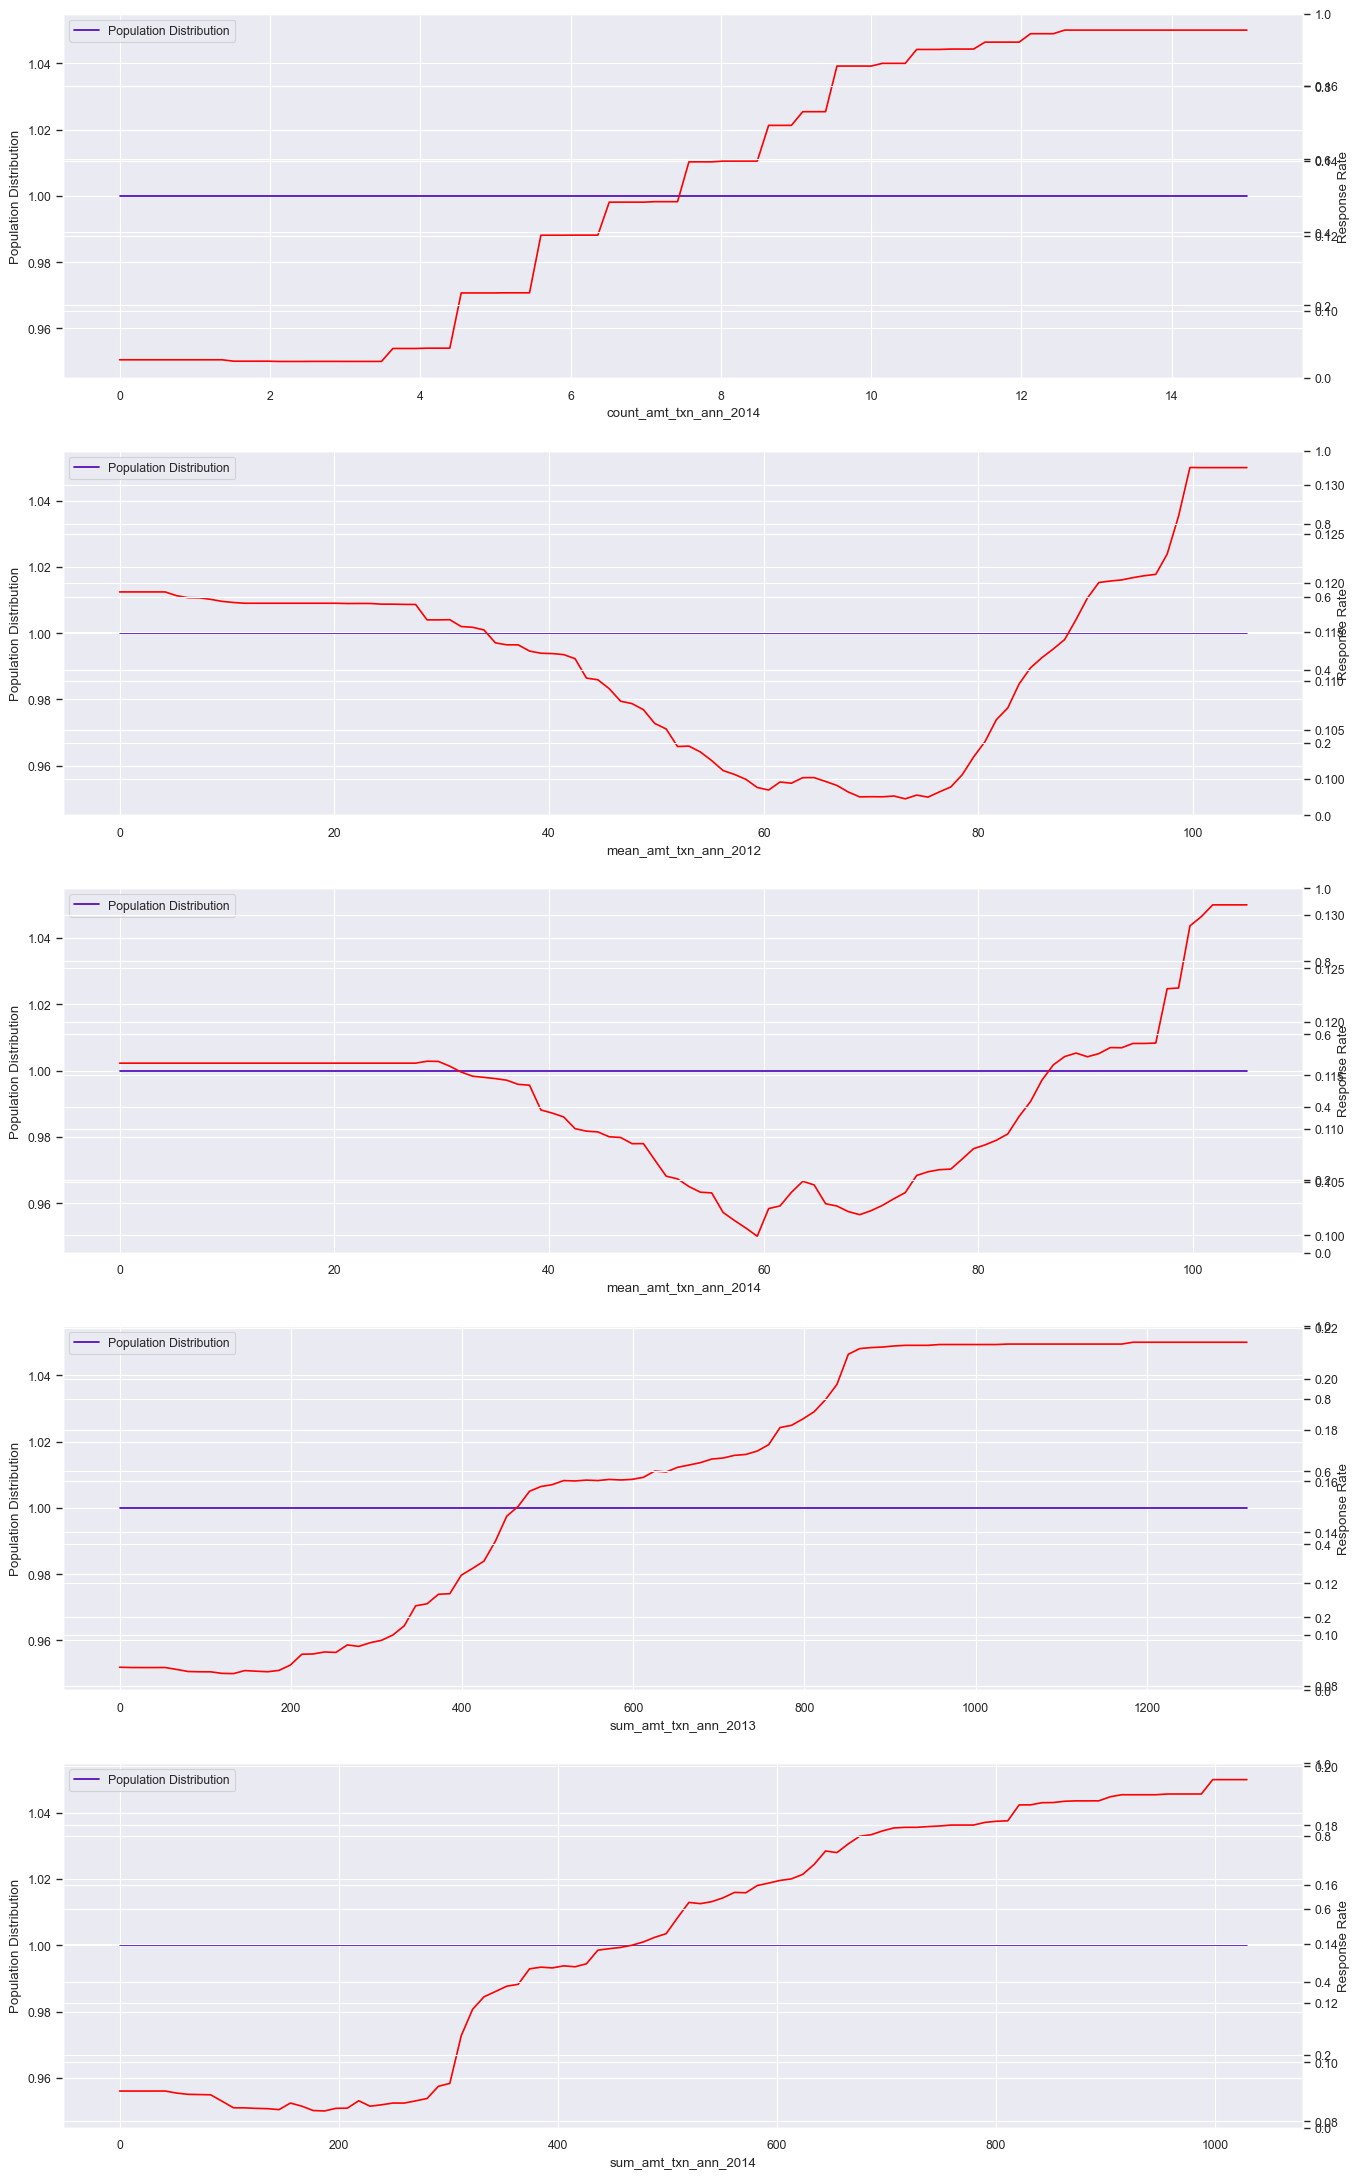

In [11]:
# Train a Random Forest model on the dataset
rf = RandomForestClassifier()
rf.fit(X, y)

# Get the top 5 features based on their feature importance scores
feature_importances = rf.feature_importances_
top_5_features = X.columns[np.argsort(feature_importances)[-5:]]

# Define the range of values to plot for each feature
x_ranges = {}
for feature in top_5_features:
    x_ranges[feature] = np.linspace(X[feature].min(), X[feature].max(), 100)

# Generate the partial dependency plots for each feature
fig, axs = plt.subplots(5, 1, figsize=(16, 28), dpi = 100)
for i, feature in enumerate(top_5_features):
    population_distribution = []
    response_rate = []
    for x in x_ranges[feature]:
        X_temp = X.copy()
        X_temp[feature] = x
        population_distribution.append(len(X_temp) / len(annual_features_output))
        response_rate.append(rf.predict_proba(X_temp)[:, 1].mean())
    axs[i].plot(x_ranges[feature], population_distribution, label='Population Distribution')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Population Distribution')
    axs[i].legend(loc='upper left')
    axs[i].twinx().plot(x_ranges[feature], response_rate, color='r', label='Response Rate')
    axs[i].twinx().set_ylabel('Response Rate')
    axs[i].legend(loc='upper left')

plt.show()

## Bonus Attempt

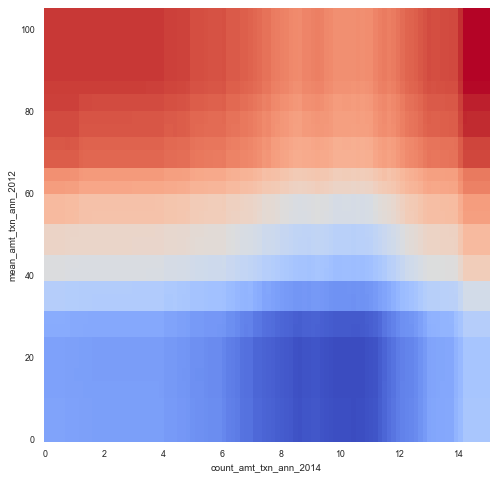

In [14]:
# Get the two best features (Takes too long to process)
best_features = [top_5_features[0], top_5_features[1]]

# Create a 2D plot for the two best features
fig, ax = plt.subplots(figsize=(8, 8))
response_rate_2d = np.zeros((len(x_ranges[best_features[0]]), len(x_ranges[best_features[1]])))
for i, x1 in enumerate(x_ranges[best_features[0]]):
    for j, x2 in enumerate(x_ranges[best_features[1]]):
        X_temp = X.copy()
        X_temp[best_features[0]] = x1
        X_temp[best_features[1]] = x2
        response_rate_2d[i, j] = rf.predict_proba(X_temp)[:, 1].mean()
ax.pcolormesh(x_ranges[best_features[0]], x_ranges[best_features[1]], response_rate_2d, shading='auto', cmap='coolwarm')
ax.set_xlabel(best_features[0])
ax.set_ylabel(best_features[1])
plt.show()

In [ ]:
# Generate 2D plots for pairs of features (Takes too long to process)

# fig_2d, axs_2d = plt.subplots(5, 4, figsize=(20, 20))
# for i, feature1 in enumerate(top_5_features):
#     for j, feature2 in enumerate(top_5_features):
#         if i != j:
#             response_rate_2d = np.zeros((len(x_ranges[feature1]), len(x_ranges[feature2])))
#             for ix, x1 in enumerate(x_ranges[feature1]):
#                 for jx, x2 in enumerate(x_ranges[feature2]):
#                     X_temp = X.copy()
#                     X_temp[feature1] = x1
#                     X_temp[feature2] = x2
#                     response_rate_2d[ix, jx] = rf.predict_proba(X_temp)[:, 1].mean()
#             axs_2d[i, j].pcolormesh(x_ranges[feature1], x_ranges[feature2], response_rate_2d)
#             axs_2d[i, j].set_xlabel(feature1)
#             axs_2d[i, j].set_ylabel(feature2)

# plt.show()